In [1]:
def print_df(df):
    print(df.to_string(index=False))

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]
rows = []
club_links = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols_text = [col.text.strip() for col in cols]
    cols_text[-1] = '-'.join(cols_text[-1].split()) 
    club_link = row.find('a')['href']
    cols_text.insert(1, f"https://www.jleague.co{club_link}")
    club_links.append(f"https://www.jleague.co{club_link}")
    rows.append(cols_text)

    
headers.insert(1, 'Link')
df = pd.DataFrame(rows, columns=headers)
df.rename(columns={'CLUB': 'Team Name', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
df['Team Name'] = df['Team Name'].replace('Yokohama F･Marinos', 'Yokohama F.Marinos')
print_df(df)


Position                                                     Link                  Team Name  P  W  D  L GF GA  GD Points      Form
       1                https://www.jleague.co/clubs/Vissel-Kobe/                Vissel Kobe 37 20  9  8 58 36  22     69 W-L-W-D-D
       2          https://www.jleague.co/clubs/FC-Machida-Zelvia/          FC Machida Zelvia 37 19  9  9 53 31  22     66 L-D-L-W-W
       3        https://www.jleague.co/clubs/Sanfrecce-Hiroshima/        Sanfrecce Hiroshima 36 18 11  7 66 39  27     65   W-L-L-L
       4                https://www.jleague.co/clubs/Gamba-Osaka/                Gamba Osaka 37 17 12  8 46 34  12     63 W-D-W-W-W
       5            https://www.jleague.co/clubs/Kashima-Antlers/            Kashima Antlers 37 17 11  9 57 40  17     62 D-W-D-D-W
       6                https://www.jleague.co/clubs/Tokyo-Verdy/                Tokyo Verdy 37 14 13 10 51 51   0     55 L-W-W-D-L
       7         https://www.jleague.co/clubs/Yokohama-F-Marinos/         Yo

In [3]:
df.dtypes

Position     object
Link         object
Team Name    object
P            object
W            object
D            object
L            object
GF           object
GA           object
GD           object
Points       object
Form         object
dtype: object

In [4]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Position'] = df['Position'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)
df['Team Name'] = df['Team Name'].astype(str)
df['Form'] = df['Form'].astype(str)

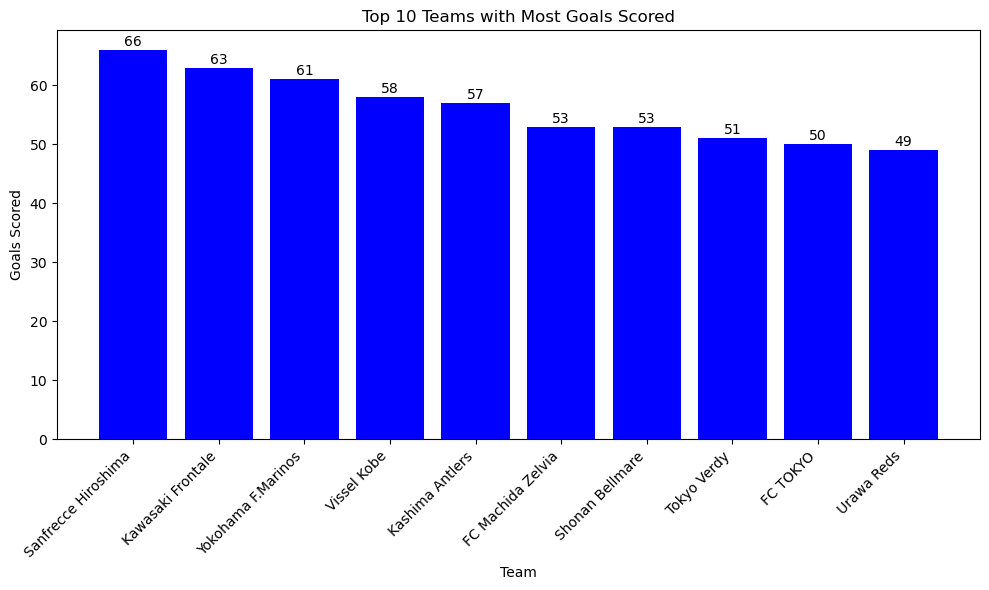

In [5]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Team Name'], top_scorers['GF'], color='blue')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Teams with Most Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for index, value in enumerate(top_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center', va='bottom')
plt.show()


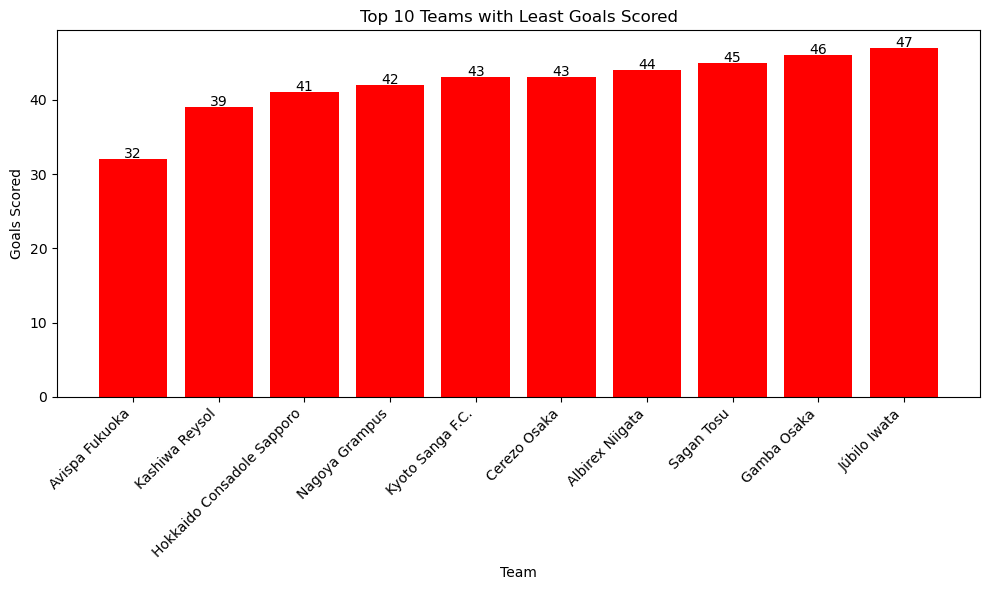

In [6]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(less_scorers['Team Name'], less_scorers['GF'], color = 'red')
for index, value in enumerate(less_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
grouped = df.groupby('GF')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Scored', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Scored  Count of Teams                         Team Names
                 66               1                Sanfrecce Hiroshima
                 63               1                  Kawasaki Frontale
                 61               1                 Yokohama F.Marinos
                 58               1                        Vissel Kobe
                 57               1                    Kashima Antlers
                 53               2 FC Machida Zelvia, Shonan Bellmare
                 51               1                        Tokyo Verdy
                 50               1                           FC TOKYO
                 49               1                         Urawa Reds
                 47               1                       Júbilo Iwata
                 46               1                        Gamba Osaka
                 45               1                         Sagan Tosu
                 44               1                    Albirex Niigata
      

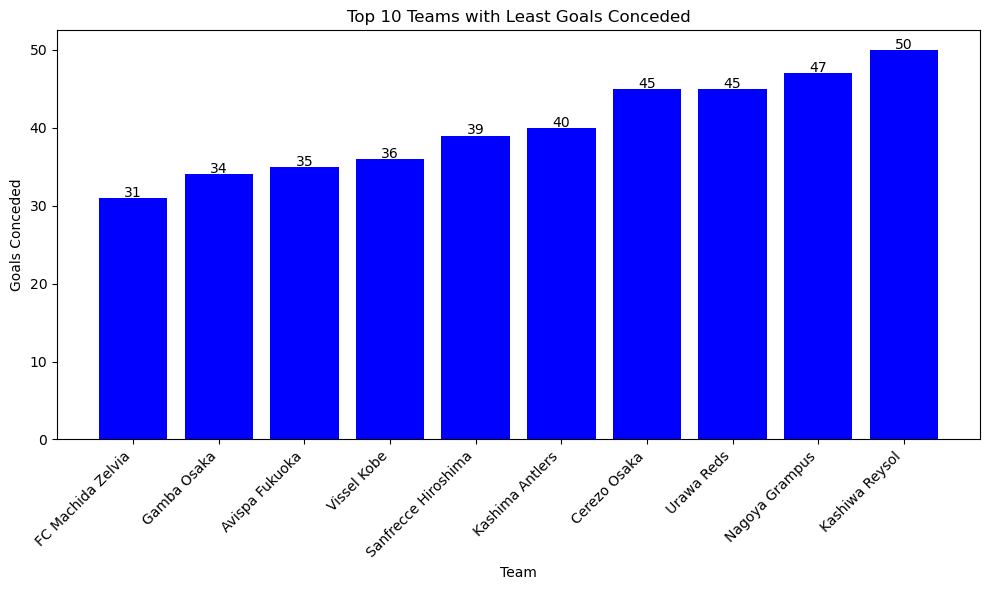

In [8]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(best_defense['Team Name'], best_defense['GA'], color = 'blue')
for index, value in enumerate(best_defense['GA']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

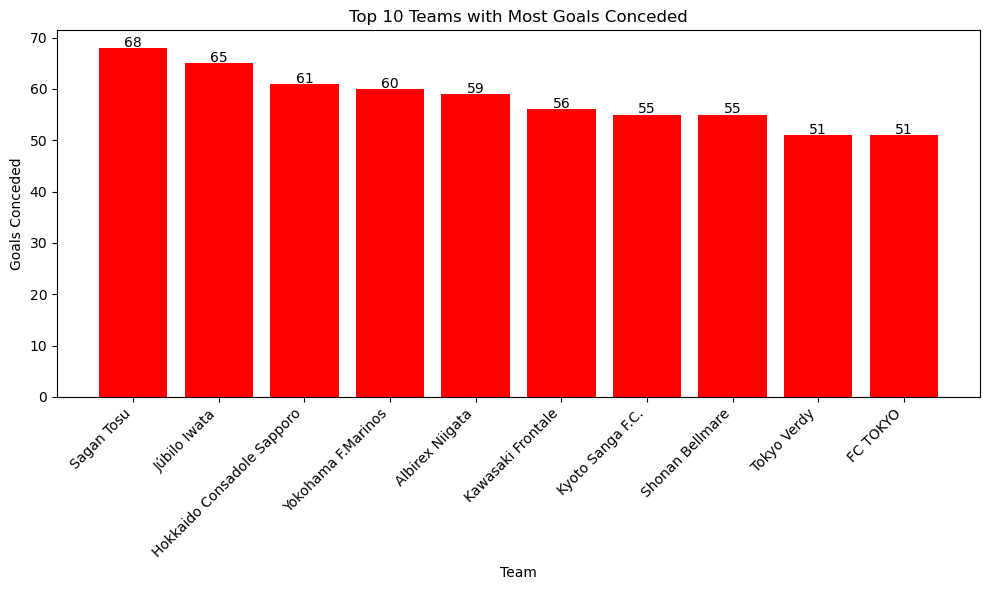

In [9]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(worst_defense['Team Name'], worst_defense['GA'], color = 'red')
for index, value in enumerate(worst_defense['GA']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.title('Top 10 Teams with Most Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
grouped = df.groupby('GA')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Conceded', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Conceded  Count of Teams                        Team Names
                   31               1                 FC Machida Zelvia
                   34               1                       Gamba Osaka
                   35               1                    Avispa Fukuoka
                   36               1                       Vissel Kobe
                   39               1               Sanfrecce Hiroshima
                   40               1                   Kashima Antlers
                   45               2          Cerezo Osaka, Urawa Reds
                   47               1                    Nagoya Grampus
                   50               1                    Kashiwa Reysol
                   51               2             Tokyo Verdy, FC TOKYO
                   55               2 Kyoto Sanga F.C., Shonan Bellmare
                   56               1                 Kawasaki Frontale
                   59               1                   Albirex 

In [11]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Team Name', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print_df(l5p)


 Position                  Team Name  Points over the last 5 games
        4                Gamba Osaka                            13
        7         Yokohama F.Marinos                            11
       10             Avispa Fukuoka                            10
       15            Shonan Bellmare                            10
        5            Kashima Antlers                             9
        1                Vissel Kobe                             8
       14           Kyoto Sanga F.C.                             8
       12                 Urawa Reds                             8
        2          FC Machida Zelvia                             7
       20                 Sagan Tosu                             7
        8               Cerezo Osaka                             7
        6                Tokyo Verdy                             7
       18               Júbilo Iwata                             6
       11          Kawasaki Frontale                          

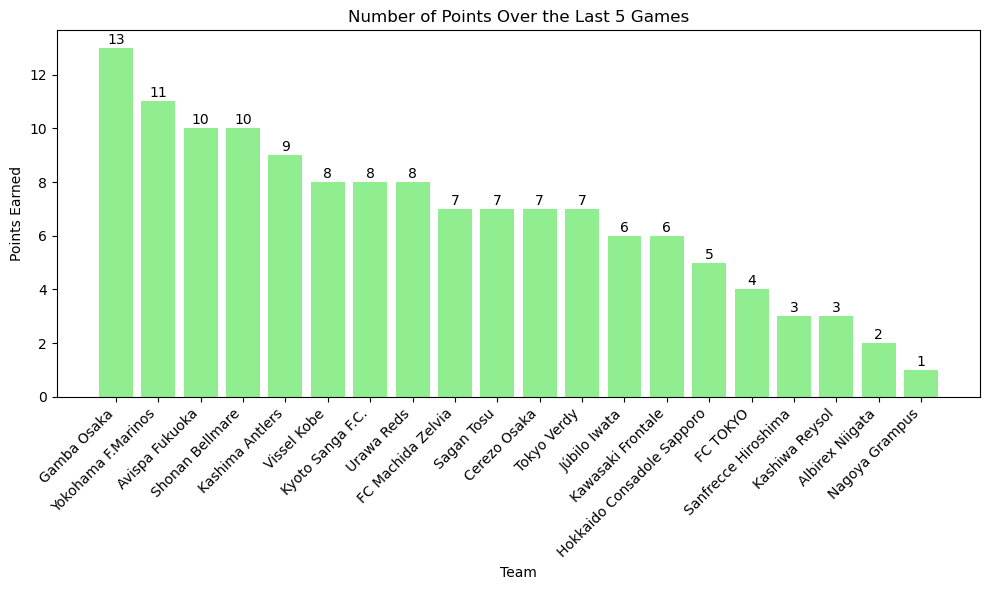

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(l5p['Team Name'], l5p['Points over the last 5 games'], color = 'lightgreen')
for index, value in enumerate(l5p['Points over the last 5 games']):
    plt.text(index,value + 0.15, str(value), ha='center')
plt.title('Number of Points Over the Last 5 Games')
plt.xlabel('Team')
plt.ylabel('Points Earned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

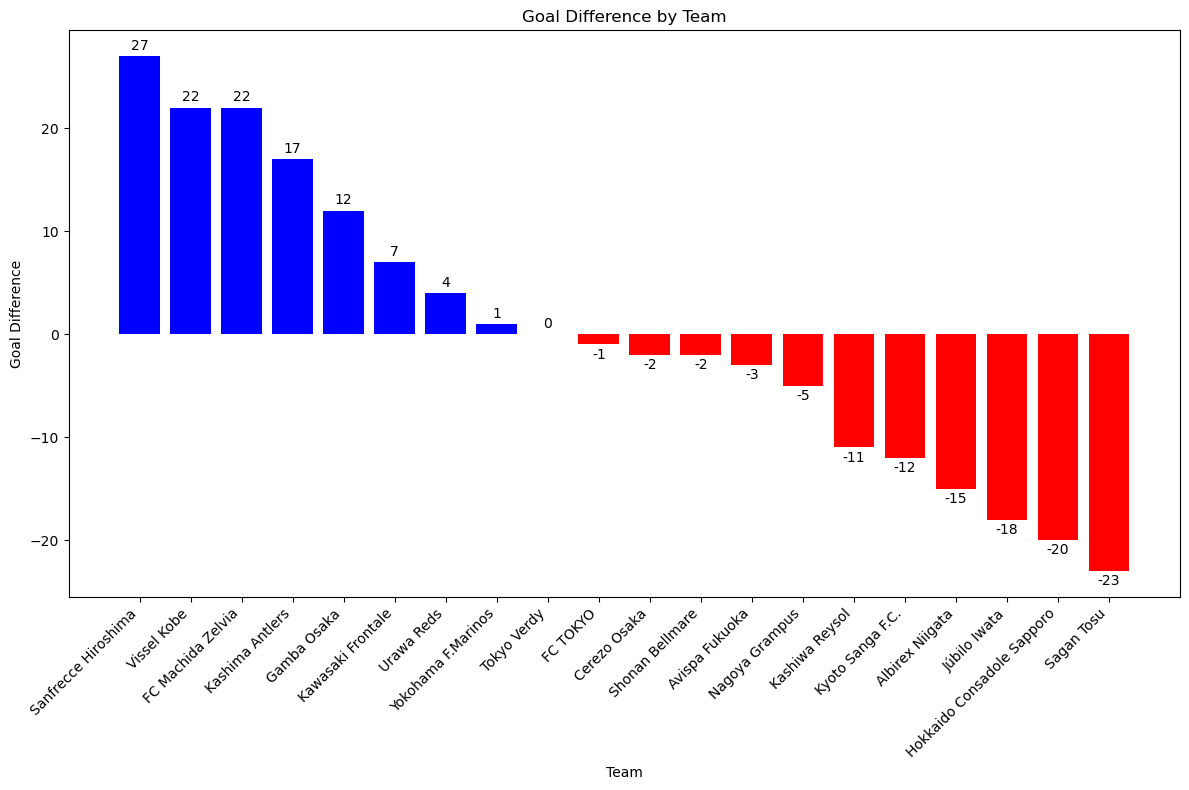

In [13]:
df2 = df.sort_values(by='GD', ascending=False)
colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]
plt.figure(figsize=(12,8))
bars = plt.bar(df2['Team Name'], df2['GD'], color=colors)
for bar, value in zip(bars, df2['GD']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3 if value >= 0 else bar.get_height() - 0.3,
             str(value), ha='center', va='bottom' if value >= 0 else 'top')
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
grouped = df.groupby('GD')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Goal Difference', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Goal Difference', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Goal Difference  Count of Teams                     Team Names
              27               1            Sanfrecce Hiroshima
              22               2 Vissel Kobe, FC Machida Zelvia
              17               1                Kashima Antlers
              12               1                    Gamba Osaka
               7               1              Kawasaki Frontale
               4               1                     Urawa Reds
               1               1             Yokohama F.Marinos
               0               1                    Tokyo Verdy
              -1               1                       FC TOKYO
              -2               2  Cerezo Osaka, Shonan Bellmare
              -3               1                 Avispa Fukuoka
              -5               1                 Nagoya Grampus
             -11               1                 Kashiwa Reysol
             -12               1               Kyoto Sanga F.C.
             -15               1        

In [15]:
grouped = df.groupby('Points')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Points', 'Count of Teams', 'Team Names']
grouped = grouped.sort_values(by='Total Points', ascending=False).reset_index(drop=True)
print_df(grouped)

 Total Points  Count of Teams                       Team Names
           69               1                      Vissel Kobe
           66               1                FC Machida Zelvia
           65               1              Sanfrecce Hiroshima
           63               1                      Gamba Osaka
           62               1                  Kashima Antlers
           55               1                      Tokyo Verdy
           52               2 Yokohama F.Marinos, Cerezo Osaka
           51               1                         FC TOKYO
           50               1                   Avispa Fukuoka
           49               1                Kawasaki Frontale
           47               2       Urawa Reds, Nagoya Grampus
           46               1                 Kyoto Sanga F.C.
           45               1                  Shonan Bellmare
           41               2  Kashiwa Reysol, Albirex Niigata
           38               1                     Júbil

In [16]:
df['Points Per Game'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='Points Per Game', ascending=False)

df_sorted = df_sorted[['Position','Team Name', 'Points Per Game']]

print_df(df_sorted)

 Position                  Team Name  Points Per Game
        1                Vissel Kobe         1.864865
        3        Sanfrecce Hiroshima         1.805556
        2          FC Machida Zelvia         1.783784
        4                Gamba Osaka         1.702703
        5            Kashima Antlers         1.675676
        6                Tokyo Verdy         1.486486
        7         Yokohama F.Marinos         1.405405
        8               Cerezo Osaka         1.405405
        9                   FC TOKYO         1.378378
       10             Avispa Fukuoka         1.351351
       11          Kawasaki Frontale         1.324324
       12                 Urawa Reds         1.270270
       13             Nagoya Grampus         1.270270
       14           Kyoto Sanga F.C.         1.243243
       15            Shonan Bellmare         1.216216
       16             Kashiwa Reysol         1.108108
       17            Albirex Niigata         1.108108
       18               Júbi